#DSCI 631: Random Forest Classifier Model on Apple Stock Prices

Group Members
1.	Vijval Vemula: vv354@drexel.edu
2.	Tyler Brenner: tb3327@drexel.edu
3.	Priyanka Patil: pp673@drexel.edu

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score
from google.colab import drive

drive.mount("/content/drive")
pd.set_option("display.max_columns", None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = yf.Ticker("AAPL").history(period = "max")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,0.0,0.0
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,0.0,0.0


In [ ]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10840.000000,10840.000000,10840.000000,10840.000000,1.084000e+04,10840.000000,10840.000000
mean,19.096421,19.307179,18.895071,19.109987,3.218014e+08,0.000718,0.001568
std,41.120978,41.581443,40.694674,41.159301,3.364419e+08,0.011363,0.084270
min,0.038432,0.038432,0.038000,0.038000,0.000000e+00,0.000000,0.000000
25%,0.240487,0.245735,0.235116,0.241237,1.163568e+08,0.000000,0.000000
50%,0.416346,0.423452,0.410665,0.417329,2.092720e+08,0.000000,0.000000
75%,16.410647,16.567432,16.256637,16.398117,4.016975e+08,0.000000,0.000000
max,195.717515,197.702207,194.760064,195.926956,7.421641e+09,0.240000,7.000000


In [ ]:
data = data.rename(columns = lambda x : x.lower())
data

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,0.0,0.0
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,0.0,0.0


In [ ]:
#Removing the unwanted columns
del data["dividends"]
del data["stock splits"]
data

,open,high,low,close,volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600
...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700


In [ ]:
data.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [ ]:
data.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-11-28 00:00:00-05:00', '2023-11-29 00:00:00-05:00',
               '2023-11-30 00:00:00-05:00', '2023-12-01 00:00:00-05:00',
               '2023-12-04 00:00:00-05:00', '2023-12-05 00:00:00-05:00',
               '2023-12-06 00:00:00-05:00', '2023-12-07 00:00:00-05:00',
               '2023-12-08 00:00:00-05:00', '2023-12-11 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10840, freq=None)

<Axes: xlabel='Date'>

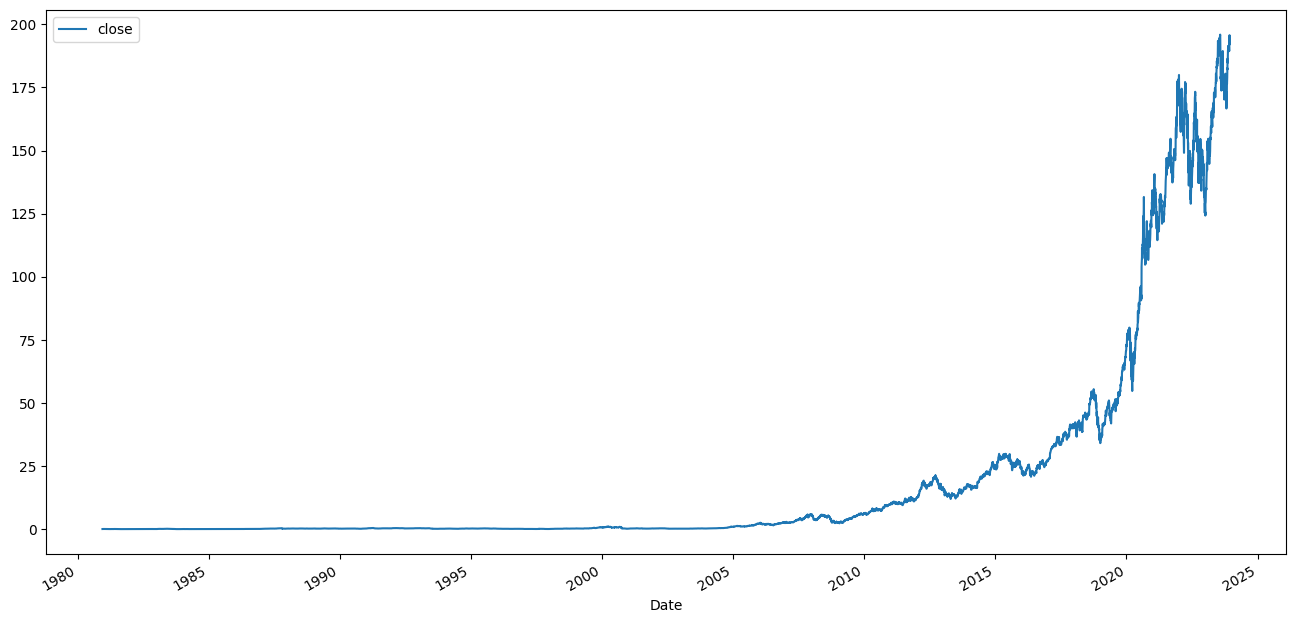

In [ ]:
data.plot.line(y = "close", figsize = (16, 8))

In the dataset we created new column called "tommorow". The values of this column is the values of the "close" column. But with the shift of -1.​

After this we have created another column called "target" column. This is a binary valued cloumn with values 0  and 1. ​

0 indicates "tommorow" column < "close" column​

1 indicates "tommorow" column >  "close" column​

Our aim is to predict target column.​

In [ ]:
data["tomorrow"] = data["close"].shift(-1)
data

,open,high,low,close,volume,tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097591
...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,192.320007
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,194.270004
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,195.710007


In [ ]:
data["target"] = (data["tomorrow"] > data["close"]).astype(int)
data

,open,high,low,close,volume,tomorrow,target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137,0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228,0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387,1
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978,1
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097591,1
...,...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,192.320007,0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,194.270004,1
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,195.710007,1


In [ ]:
data = data.loc["1990-01-01" : ].copy()
data

,open,high,low,close,volume,tomorrow,target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.249271,0.265181,0.247503,0.263414,183198400,0.265181,1
1990-01-03 00:00:00-05:00,0.268718,0.268718,0.265181,0.265181,207995200,0.266066,1
1990-01-04 00:00:00-05:00,0.270485,0.274021,0.263414,0.266066,221513600,0.266950,1
1990-01-05 00:00:00-05:00,0.266950,0.270485,0.261646,0.266950,123312000,0.268718,1
1990-01-08 00:00:00-05:00,0.265181,0.268718,0.261646,0.268718,101572800,0.266066,0
...,...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,192.320007,0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,194.270004,1
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,195.710007,1


<Axes: xlabel='Date'>

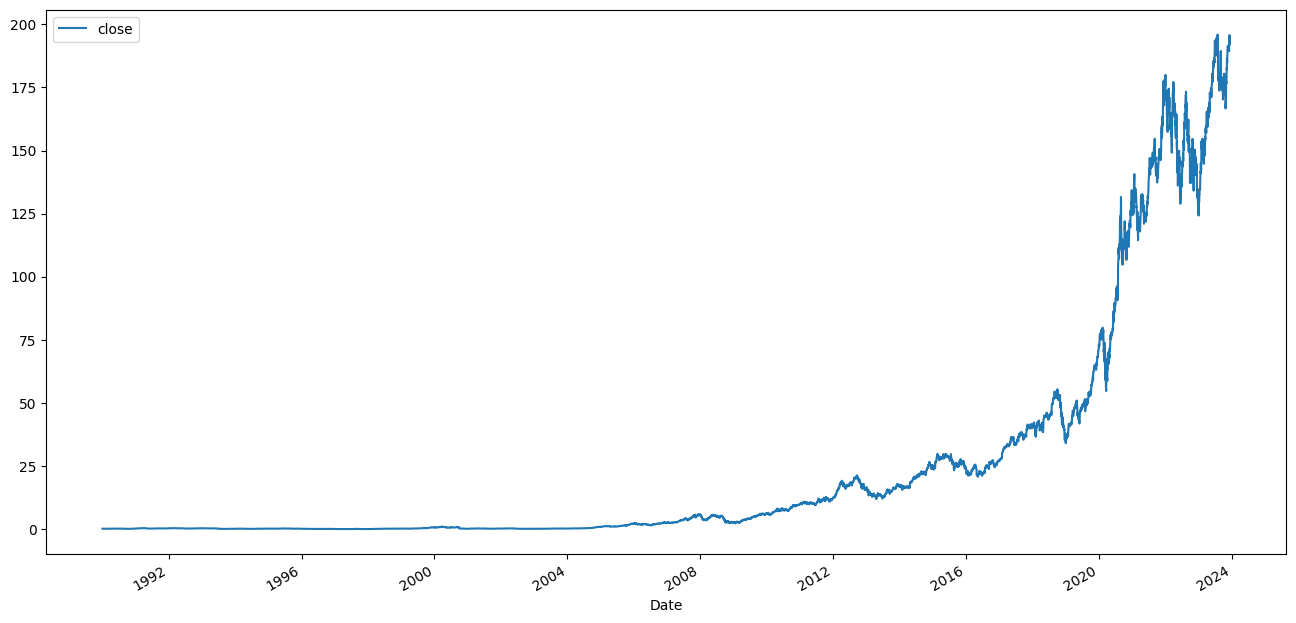

In [ ]:
data.plot.line(y = "close", figsize = (16, 8))

Creating and configuring a Random Forest Classifier (RFC) model. The RandomForestClassifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) of the individual trees for classification tasks. In this specific instantiation, the RFC is configured with 100 decision trees (n_estimators = 100), a minimum number of samples required to split an internal node set to 100 (min_samples_split = 100), and a specified random seed (random_state = 1) for reproducibility. The code then prepares the data by selecting two features ("close" and "tomorrow") as input variables (X) and the "target" variable as the output variable (y). Finally, it splits the data into training and testing sets using an 80-20 split ratio and a fixed random seed for consistent results in subsequent runs.

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
X = data[["close", "tomorrow"]]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
train = data.iloc[ : -100]
test = data.iloc[-100 : ]
predictors = ["open", "high", "low", "close", "volume"]
rfc.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
preds = rfc.predict(test[predictors])
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
preds = pd.Series(preds, index = test.index)


In [ ]:
preds

Date
2023-07-21 00:00:00-04:00    0
2023-07-24 00:00:00-04:00    0
2023-07-25 00:00:00-04:00    0
2023-07-26 00:00:00-04:00    0
2023-07-27 00:00:00-04:00    0
                            ..
2023-12-05 00:00:00-05:00    0
2023-12-06 00:00:00-05:00    0
2023-12-07 00:00:00-05:00    0
2023-12-08 00:00:00-05:00    0
2023-12-11 00:00:00-05:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test["target"], preds)

0.6818181818181818

In [ ]:
res = pd.DataFrame(
    {
        "target": test["target"],
        "predictions": preds
    }
)
res

,target,predictions
Date,,
2023-07-21 00:00:00-04:00,1,0
2023-07-24 00:00:00-04:00,1,0
2023-07-25 00:00:00-04:00,1,0
2023-07-26 00:00:00-04:00,0,0
2023-07-27 00:00:00-04:00,1,0
...,...,...
2023-12-05 00:00:00-05:00,0,0
2023-12-06 00:00:00-05:00,1,0
2023-12-07 00:00:00-05:00,1,0


<Axes: xlabel='Date'>

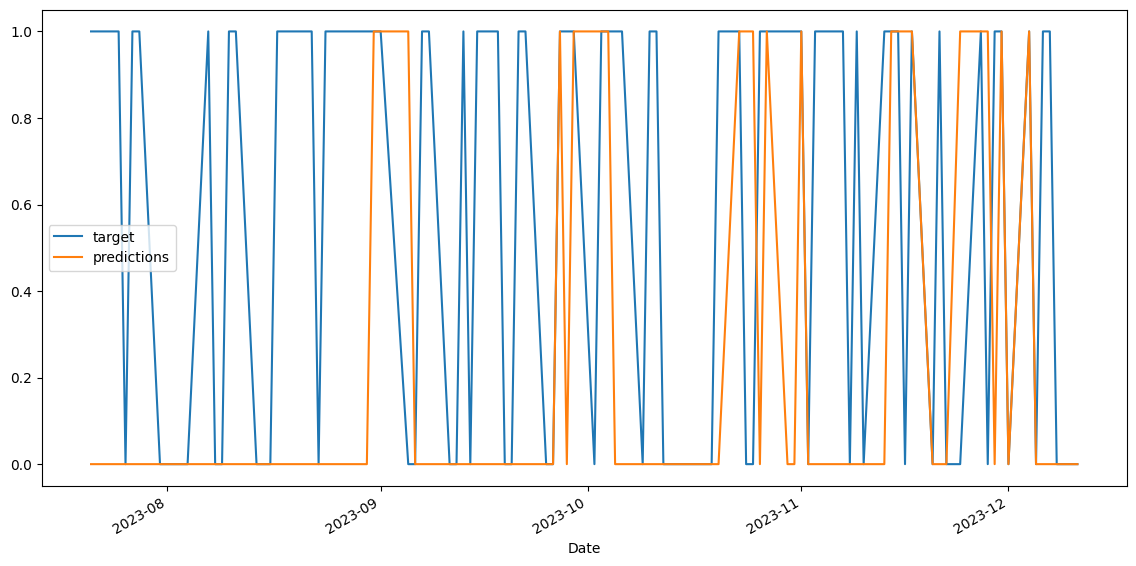

In [ ]:
res.plot(figsize = (14, 7))

In [ ]:
accuracy = accuracy_score(res["target"], res["predictions"])
conf_matrix = confusion_matrix(res["target"], res["predictions"])
classification_rep = classification_report(res["target"], res["predictions"])

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.51
Confusion Matrix:
[[36  7]
 [42 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.84      0.60        43
           1       0.68      0.26      0.38        57

    accuracy                           0.51       100
   macro avg       0.57      0.55      0.49       100
weighted avg       0.59      0.51      0.47       100



The performance of the RandomForest Classifier, as indicated by the provided metrics, appears to be modest. The accuracy of 0.51 suggests that the model correctly predicted the class labels for approximately half of the instances in the test set. However, accuracy alone may not provide a comprehensive assessment of the model's performance, especially in the presence of imbalanced classes.

The confusion matrix reveals that the model has some difficulty distinguishing between the two classes. The relatively low precision (0.46) for class 0 and precision (0.68) for class 1 indicate that the classifier is more successful at identifying instances of class 1, but less accurate when it comes to classifying instances of class 0. The recall values also highlight the imbalances, with class 0 having higher recall (0.84) than class 1 (0.26), suggesting that the model tends to capture more instances of class 0 but struggles to identify class 1 instances.

The F1-score, which considers both precision and recall, is lower for both classes, indicating a compromise between precision and recall. The macro-average and weighted-average metrics provide an overall perspective on the model's performance across both classes, showing that there is room for improvement.

In summary, while the RandomForest Classifier demonstrates some capability in classifying instances, there are clear indications of imbalances and suboptimal performance for certain classes. Further tuning of hyperparameters, feature engineering, or exploring alternative models may be necessary to enhance the overall performance of the classifier.
